In [1]:
import gym
import numpy as np
from IPython import display
from matplotlib import pyplot as plt
from maze_env import Maze
from utils import plot_policy, plot_action_values, test_agent


%matplotlib inline

c:\Users\mohdm\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


### Initializing the environment

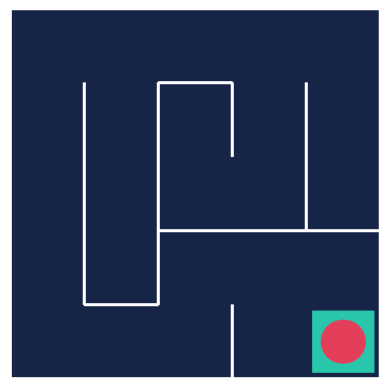

In [2]:
env = Maze()

frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)


In [3]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define value table $Q(s,s)$

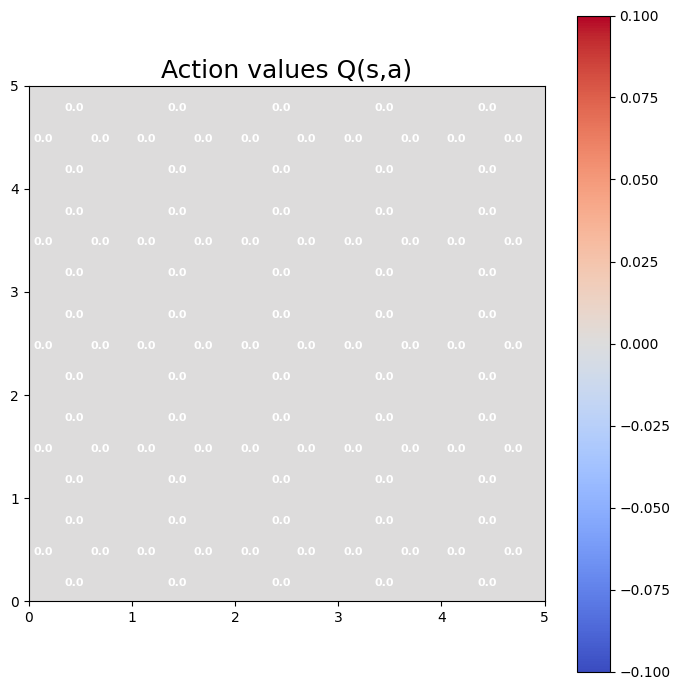

In [4]:
action_values = np.zeros(shape=(5, 5, 4))  # 5 x 5 x 4 because 25 states and 4 actions

plot_action_values(action_values)

## Define the policy $\pi(s)$

In [5]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

### Plot the Policy

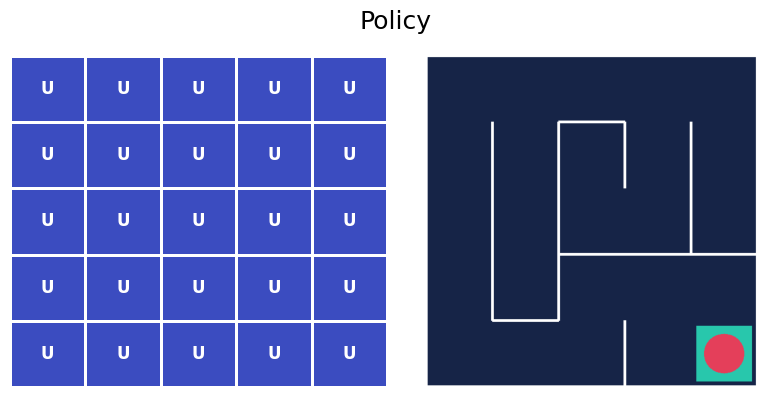

In [6]:
plot_policy(action_values, env.render(mode='rgb_array'))

## Implement the Algorithm

In [7]:
def sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2):

    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        done = False
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = policy(next_state, epsilon)

            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            state = next_state
            action = next_action

In [8]:
sarsa(action_values, policy, 1000)

## Show Results

### Show resulting value table $Q(s,s)$

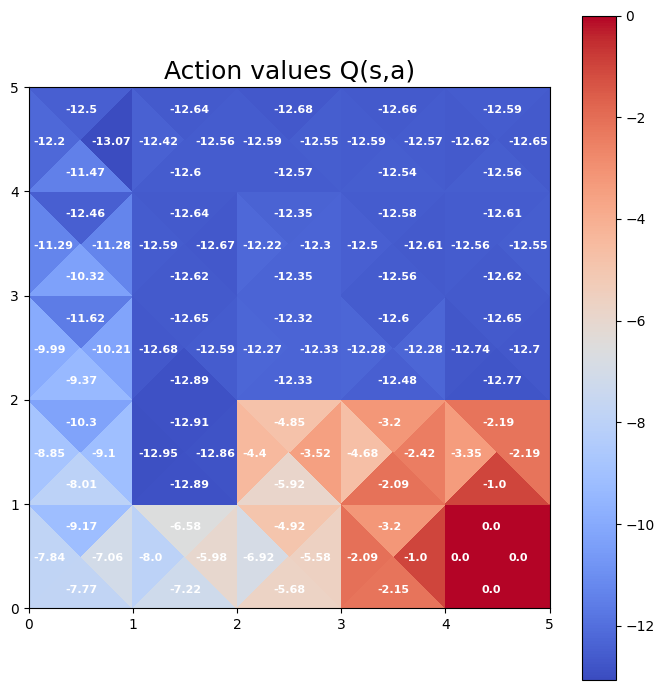

In [9]:
plot_action_values(action_values)

Each small triangle inside a grid cell shows the expected reward (Q-value) for taking a specific action from that state.

## Show resulting value policy $\pi(.|s)$

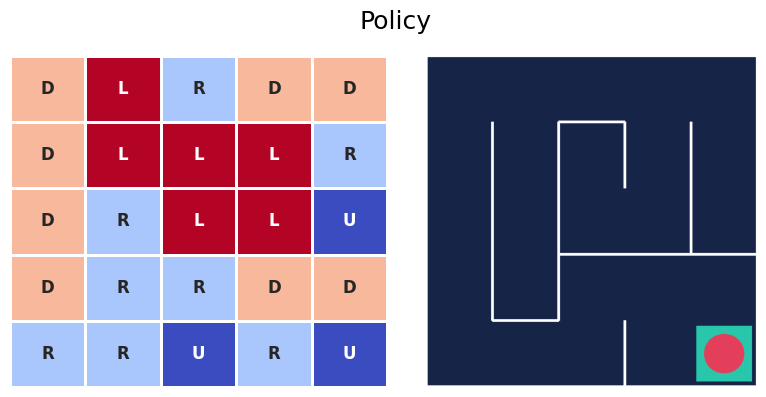

In [10]:
plot_policy(action_values, frame)

## Test the agent

In [ ]:
test_agent(env, policy)

![image.png](attachment:image.png)